In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gammainc
from scipy.linalg import cholesky
from FisherS import SeparabilityAnalysis

def randsphere(n_points,ndim,radius,center = []):
    if center == []:
        center = np.array([0]*ndim)
    r = radius
    x = np.random.normal(size=(n_points, ndim))
    ssq = np.sum(x**2,axis=1)
    fr = r*gammainc(ndim/2,ssq/2)**(1/ndim)/np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_points,1),(1,ndim))
    p = center + np.multiply(x,frtiled)
    return p, center

def randellipse(S, z_hat, m_FA, Gamma_Threshold=1.0):

    nz = S.shape[0]
    z_hat = z_hat.reshape(nz,1)

    X_Cnz = np.random.normal(size=(nz, m_FA))

    rss_array = np.sqrt(np.sum(np.square(X_Cnz),axis=0))
    kron_prod = np.kron( np.ones((nz,1)), rss_array)

    X_Cnz = X_Cnz / kron_prod       # Points uniformly distributed on hypersphere surface

    R = np.ones((nz,1))*( np.power( np.random.rand(1,m_FA), (1./nz)))

    unif_sph=R*X_Cnz;               # m_FA points within the hypersphere
    T = np.asmatrix(cholesky(S))    # Cholesky factorization of S => S=T’T


    unif_ell = T.H*unif_sph ; # Hypersphere to hyperellipsoid mapping

    # Translation and scaling about the center
    z_fa=(unif_ell * np.sqrt(Gamma_Threshold)+(z_hat * np.ones((1,m_FA))))

    return np.array(z_fa)

In [2]:
cov_mat = np.array([[1.5,1],[1,1]])
ellipse = randellipse(cov_mat, np.array([0,0]), m_FA=1000)
sphere = randsphere(n_points=1000,ndim=2,radius=1,center = [0,0])[0].T

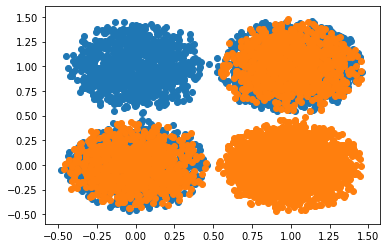

In [3]:
sphere1 = randsphere(n_points=1000,ndim=5,radius=.5,center = [0,0,0,0,0])[0].T
sphere2 = randsphere(n_points=1000,ndim=5,radius=.5,center = [1,1,1,0,0])[0].T
sphere3 = randsphere(n_points=1000,ndim=5,radius=.5,center = [0,1,0,0,0])[0].T
sphere4 = randsphere(n_points=1000,ndim=5,radius=.5,center = [1,1,0,0,0])[0].T
_2spheres = np.concatenate((sphere1,sphere2),axis=1)
_3spheres = np.concatenate((sphere1,sphere2,sphere3),axis=1)
_4spheres = np.concatenate((sphere1,sphere2,sphere3,sphere4),axis=1)

plt.scatter(_4spheres[0],_4spheres[1])
plt.scatter(_4spheres[1],_4spheres[2])

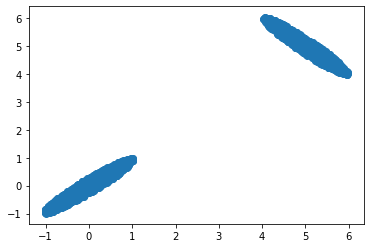

In [4]:
cov_mat = np.array([[1.1,1],[1,1]])
ellipse1 = randellipse(cov_mat, np.array([0,0]), m_FA=1000)
cov_mat = np.array([[1,-1],[-1,1.1]])
ellipse2 = randellipse(cov_mat, np.array([5,5]), m_FA=1000)
_2ellipses = np.concatenate((ellipse1,ellipse2),axis=1)
plt.scatter(_2ellipses[0],_2ellipses[1])

In [5]:
dim=2
cov_mat = np.ones((dim,dim))
variances = [1,2,3]
np.fill_diagonal(cov_mat,variances)
ellipse1 = randellipse(cov_mat, np.array([0,0]), m_FA=1000)

cov_mat = -np.ones((dim,dim))
variances = [1,2,3]
np.fill_diagonal(cov_mat,variances)
ellipse2 = randellipse(cov_mat, np.array([5,5]), m_FA=1000)
_2ellipses = np.concatenate((ellipse1,ellipse2),axis=1)

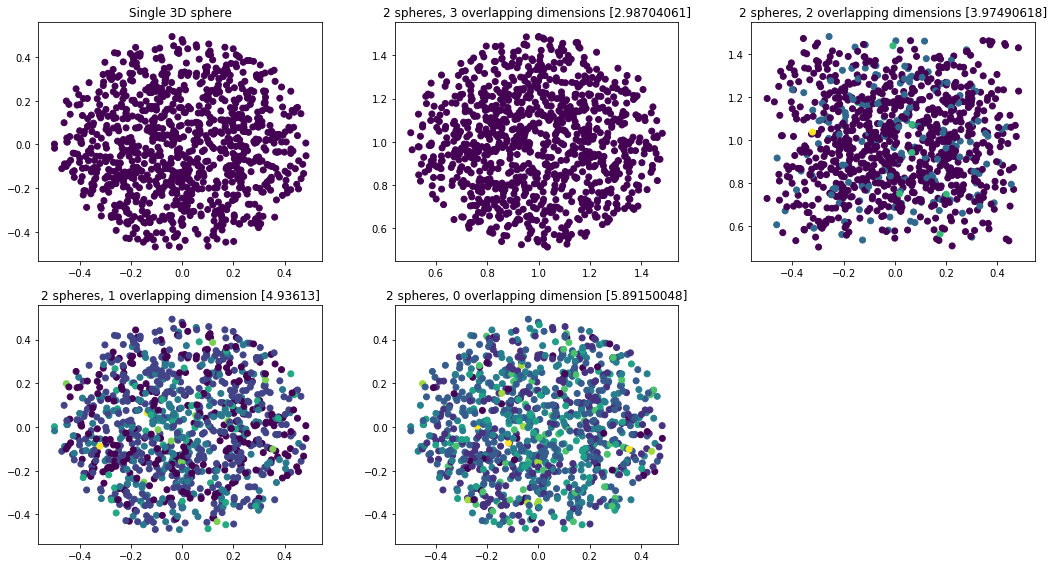

In [44]:
sphere1 = randsphere(n_points=1000,ndim=3,radius=.5,center = [0,0,0])[0].T
sphere2 = randsphere(n_points=1000,ndim=3,radius=.5,center = [1,1,1])[0].T

plt.figure(figsize=(15,8))
#Spheres
[n_alpha,n_single,p_alpha,alphas,separable_fraction,Xp] = SeparabilityAnalysis(sphere1.T,ProducePlots=0)
plt.subplot(2,3,1)
plt.title('Single 3D sphere')
plt.scatter(sphere1[0],sphere1[1],c=separable_fraction)

_2spheres = np.zeros((6,1000))
_2spheres[:3] = sphere1
_2spheres[:3] = sphere2
[n_alpha,n_single,p_alpha,alphas,separable_fraction,Xp] = SeparabilityAnalysis(_2spheres.T,ProducePlots=0)
plt.subplot(2,3,2)
plt.title('2 spheres, 3 overlapping dimensions '+ str(n_single))
plt.scatter(_2spheres[0],_2spheres[1],c=separable_fraction)

_2spheres = np.zeros((6,1000))
_2spheres[:3] = sphere1
_2spheres[1:4] = sphere2
[n_alpha,n_single,p_alpha,alphas,separable_fraction,Xp] = SeparabilityAnalysis(_2spheres.T,ProducePlots=0)
plt.subplot(2,3,3)
plt.title('2 spheres, 2 overlapping dimensions '+ str(n_single))
plt.scatter(_2spheres[0],_2spheres[1],c=separable_fraction)

_2spheres = np.zeros((6,1000))
_2spheres[:3] = sphere1
_2spheres[2:5] = sphere2
[n_alpha,n_single,p_alpha,alphas,separable_fraction,Xp] = SeparabilityAnalysis(_2spheres.T,ProducePlots=0)
plt.subplot(2,3,4)
plt.title('2 spheres, 1 overlapping dimension '+ str(n_single))
plt.scatter(_2spheres[0],_2spheres[1],c=separable_fraction)

_2spheres = np.zeros((6,1000))
_2spheres[:3] = sphere1
_2spheres[3:] = sphere2
[n_alpha,n_single,p_alpha,alphas,separable_fraction,Xp] = SeparabilityAnalysis(_2spheres.T,ProducePlots=0)
plt.subplot(2,3,5)
plt.title('2 spheres, 0 overlapping dimension '+ str(n_single))
plt.scatter(_2spheres[0],_2spheres[1],c=separable_fraction)
plt.tight_layout()
plt.show()

[1.9685167]
[0.92294682]


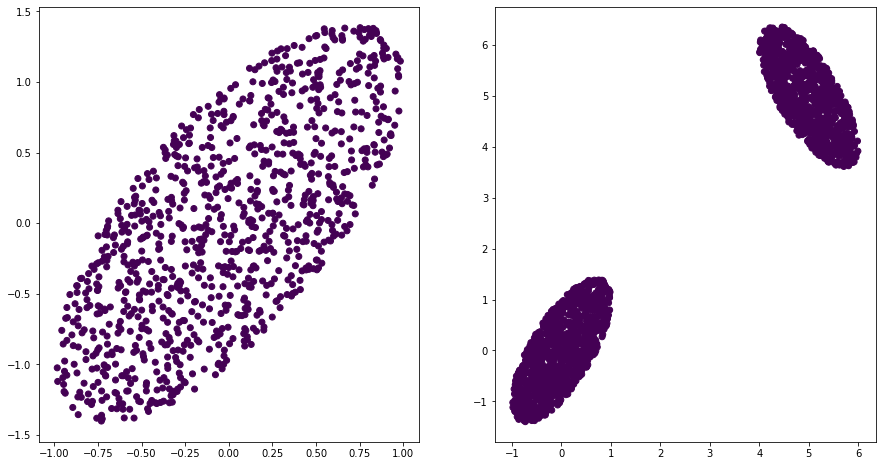

In [95]:
plt.figure(figsize=(15,8))
#Ellipse
[n_alpha,n_single,p_alpha,alphas,separable_fraction,Xp] = SeparabilityAnalysis(ellipse1.T,ProducePlots=0)
print(n_single)
plt.subplot(1,2,1)
plt.scatter(ellipse1[0],ellipse1[1],c=separable_fraction)

[n_alpha,n_single,p_alpha,alphas,separable_fraction,Xp] = SeparabilityAnalysis(_2ellipses.T,ProducePlots=0)
print(n_single)
plt.subplot(1,2,2)
plt.scatter(_2ellipses[0],_2ellipses[1],c=separable_fraction)
plt.show()